In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import datetime
from math import ceil
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [80]:
telemetry =pd.read_csv('PdM_telemetry.csv')
errors=pd.read_csv('PdM_errors.csv')
maint=pd.read_csv('PdM_maint.csv')
machines=pd.read_csv('PdM_machines.csv')
failures=pd.read_csv('PdM_failures.csv')

In [81]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [82]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [83]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [84]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [85]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [86]:
telemetry['datetime'] = pd.to_datetime(
    telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))

telemetry.describe()

Total number of telemetry records: 876100


,datetime,machineID,volt,rotate,pressure,vibration
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,446.605119,100.858668,40.385007
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054
25%,2015-04-02 12:00:00,25.750000,160.304927,412.305714,93.498181,36.777299
50%,2015-07-02 18:00:00,50.500000,170.607338,447.558150,100.425559,40.237247
75%,2015-10-02 00:00:00,75.250000,181.004493,482.176600,107.555231,43.784938
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072
std,NaN,28.866087,15.509114,52.673886,11.048679,5.370361


In [87]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]


In [88]:
plot_df

,datetime,volt
0,2015-01-01 06:00:00,176.217853
1,2015-01-01 07:00:00,162.879223
2,2015-01-01 08:00:00,170.989902
3,2015-01-01 09:00:00,162.462833
4,2015-01-01 10:00:00,157.610021
...,...,...
733,2015-01-31 19:00:00,179.435527
734,2015-01-31 20:00:00,180.712544
735,2015-01-31 21:00:00,186.138292
736,2015-01-31 22:00:00,203.746333


In [89]:
fig = px.line(x=plot_df['datetime'].values, y=plot_df['volt'].values, title='Voltage over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Voltage')
fig.show()

In [90]:
errors['datetime'] = pd.to_datetime(
    errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('object')

print("Total number of error records: %d" % len(errors.index))
errors.head()

Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [91]:
fig = px.bar(x=errors['errorID'].values,
             title='Count of Errors', template='plotly_dark', color=errors['errorID'].values)
fig.update_layout(xaxis_title='Error Type', yaxis_title='Count')
fig.show()

In [92]:
maint['datetime'] = pd.to_datetime(
    maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('object')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [93]:
fig = px.bar(x=maint['comp'].values,
             title='Count of Comp', template='plotly_dark', color=maint['comp'].values)
fig.update_layout(xaxis_title='Comp Type', yaxis_title='Count')
fig.show()

In [94]:
machines['model'] = machines['model'].astype('object')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [95]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model1', 'age'], name='model1'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model2', 'age'], name='model2'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model3', 'age'], name='model3'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model4', 'age'], name='model4',))
fig.update_layout(xaxis_title='Age', yaxis_title='Count', template='plotly_dark')
fig.update_layout(barmode='stack', title='Machine Age Distribution')
fig.show()

In [96]:
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [97]:
fig = px.bar(x=failures['failure'].values, title='Count of Failures', template='plotly_dark', color=failures['failure'].values)
fig.update_layout(xaxis_title='Failure Type', yaxis_title='Count')
fig.show()

In [98]:

failures = failures.sort_values(by='datetime')
failures.reset_index(inplace=True, drop=True)

In [99]:
failures.head()

,datetime,machineID,failure
0,2015-01-02 03:00:00,56,comp3
1,2015-01-02 03:00:00,99,comp3
2,2015-01-02 03:00:00,83,comp4
3,2015-01-02 03:00:00,59,comp1
4,2015-01-02 03:00:00,16,comp1


In [100]:
failures['failure'].value_counts()

failure
comp2    259
comp1    192
comp4    179
comp3    131
Name: count, dtype: int64

In [101]:
telemetry_with_failure_df = telemetry.merge(failures, on=['datetime', 'machineID'], how='left')
telemetry_with_failure_df.fillna('No Failure', inplace=True)

In [102]:
telemetry_with_failure_df['failure'].value_counts()


failure
No Failure    875381
comp2            259
comp1            192
comp4            179
comp3            131
Name: count, dtype: int64

In [105]:
telemetry_with_failure_df = machine.merge(right=telemetry_with_failure_df, on=['machineID'], how='left')
telemetry_with_failure_df.head()

,machineID,model,age,datetime,volt,rotate,pressure,vibration,failure,source
0,1,model3,18,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686,No Failure,telemetry
1,1,model3,18,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973,No Failure,telemetry
2,1,model3,18,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847,No Failure,telemetry
3,1,model3,18,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144,No Failure,telemetry
4,1,model3,18,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511,No Failure,telemetry


In [106]:
telemetry_with_failure_df['model'].value_counts()


model
model3    306644
model4    280363
model2    148945
model1    140190
Name: count, dtype: int64

In [108]:
telemetry_with_failure_df.head()

,machineID,model,age,datetime,volt,rotate,pressure,vibration,failure,source
0,1,model3,18,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686,No Failure,telemetry
1,1,model3,18,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973,No Failure,telemetry
2,1,model3,18,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847,No Failure,telemetry
3,1,model3,18,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144,No Failure,telemetry
4,1,model3,18,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511,No Failure,telemetry


In [114]:
def strToDatetime(date_array, format):
    new_datetime = list()
    for date in date_array:
        new_datetime.append(datetime.datetime.strptime(date, format))
    return new_datetime

In [121]:
datetime_column = pd.to_datetime(telemetry_with_failure_df['datetime'], format='%Y-%m-%d %H:%M:%S')


In [122]:
telemetry_with_failure_df['datetime'] = datetime_column

In [123]:
telemetry_with_failure_df['datetime'].min(), telemetry_with_failure_df['datetime'].max()

(Timestamp('2015-01-01 06:00:00'), Timestamp('2016-01-01 06:00:00'))

In [124]:
machine_ids = np.arange(1, 101)
len(machine_ids)

100

In [125]:
telemetry_with_failure_df

,machineID,model,age,datetime,volt,rotate,pressure,vibration,failure
0,1,model3,18,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686,No Failure
1,1,model3,18,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973,No Failure
2,1,model3,18,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847,No Failure
3,1,model3,18,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144,No Failure
4,1,model3,18,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511,No Failure
...,...,...,...,...,...,...,...,...,...
876137,100,model4,5,2016-01-01 02:00:00,179.438162,395.222827,102.290715,50.771941,No Failure
876138,100,model4,5,2016-01-01 03:00:00,189.617555,446.207972,98.180607,35.123072,No Failure
876139,100,model4,5,2016-01-01 04:00:00,192.483414,447.816524,94.132837,48.314561,No Failure
876140,100,model4,5,2016-01-01 05:00:00,165.475310,413.771670,104.081073,44.835259,No Failure


In [126]:
def hours_estimation(machine_id):
    df = telemetry_with_failure_df[telemetry_with_failure_df['machineID'] == machine_id]
    df.reset_index(drop=True, inplace=True)
    rul = []
    cont = len(df['failure']) - 1
    diff = 0
    while cont >= df.index.min():
        if df['failure'][cont] == 'No Failure':
            diff = diff + 1
            rul.append(diff)
        else:
            rul.append(0)
            diff = 0
        diff = rul[-1]
        cont = cont - 1
    df['hours_to_fail'] = list(reversed(rul))
    return df

In [127]:
dfs = []
for machine_id in machine_ids:
    df = hours_estimation(machine_id)
    dfs.append(df)

In [128]:
telemetry = pd.DataFrame()
for df in dfs:
    telemetry = pd.concat([telemetry, df], axis=0)

In [129]:
print(telemetry.shape[0], telemetry_with_failure_df.shape[0])


876142 876142


In [130]:
telemetry['seconds_to_fail'] = telemetry['hours_to_fail'] * 3600
telemetry.drop('hours_to_fail', axis=1, inplace=True)
telemetry.head()

,machineID,model,age,datetime,volt,rotate,pressure,vibration,failure,seconds_to_fail
0,1,model3,18,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686,No Failure,345600
1,1,model3,18,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973,No Failure,342000
2,1,model3,18,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847,No Failure,338400
3,1,model3,18,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144,No Failure,334800
4,1,model3,18,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511,No Failure,331200


In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(telemetry.corr(), annot=True)
plt.show()

In [133]:
telemetry.columns


Index(['machineID', 'model', 'age', 'datetime', 'volt', 'rotate', 'pressure',
       'vibration', 'failure', 'seconds_to_fail'],
      dtype='object')

In [134]:
datetimes = telemetry['datetime']
timestamps = list()
for datetime_ in datetimes:
    timestamps.append(datetime.datetime.timestamp(datetime_))    
datetimes.shape[0], len(timestamps)

(876142, 876142)

In [135]:
telemetry['timestamp'] = timestamps
#telemetry.drop('datetime', axis=1, inplace=True)
#telemetry = telemetry[['timestamp', 'machineID', 'model', 'age', 'volt', 'rotate', 'pressure', 'vibration', 'failure', 'seconds_to_fail']]
telemetry

,machineID,model,age,datetime,volt,rotate,pressure,vibration,failure,seconds_to_fail,timestamp
0,1,model3,18,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686,No Failure,345600,1.420078e+09
1,1,model3,18,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973,No Failure,342000,1.420081e+09
2,1,model3,18,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847,No Failure,338400,1.420085e+09
3,1,model3,18,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144,No Failure,334800,1.420088e+09
4,1,model3,18,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511,No Failure,331200,1.420092e+09
...,...,...,...,...,...,...,...,...,...,...,...
8756,100,model4,5,2016-01-01 02:00:00,179.438162,395.222827,102.290715,50.771941,No Failure,18000,1.451599e+09
8757,100,model4,5,2016-01-01 03:00:00,189.617555,446.207972,98.180607,35.123072,No Failure,14400,1.451603e+09
8758,100,model4,5,2016-01-01 04:00:00,192.483414,447.816524,94.132837,48.314561,No Failure,10800,1.451606e+09
8759,100,model4,5,2016-01-01 05:00:00,165.475310,413.771670,104.081073,44.835259,No Failure,7200,1.451610e+09


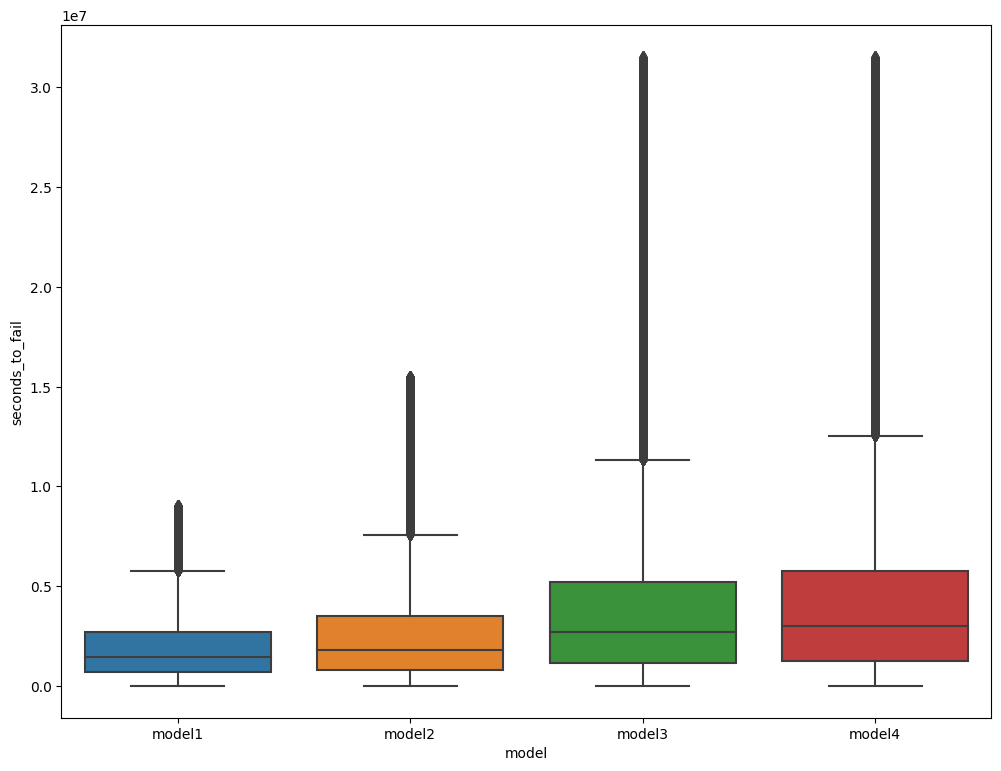

In [136]:
sns.boxplot(x=telemetry['model'], y=telemetry['seconds_to_fail'], order=['model1', 'model2', 'model3', 'model4']).figure.set_size_inches(12, 9)

In [137]:
telemetry['model'].value_counts()


model
model3    306644
model4    280363
model2    148945
model1    140190
Name: count, dtype: int64

In [138]:
model3_data = telemetry[telemetry['model'] == 'model3'].reset_index(drop=True)
model3_data

,machineID,model,age,datetime,volt,rotate,pressure,vibration,failure,seconds_to_fail,timestamp
0,1,model3,18,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686,No Failure,345600,1.420078e+09
1,1,model3,18,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973,No Failure,342000,1.420081e+09
2,1,model3,18,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847,No Failure,338400,1.420085e+09
3,1,model3,18,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144,No Failure,334800,1.420088e+09
4,1,model3,18,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511,No Failure,331200,1.420092e+09
...,...,...,...,...,...,...,...,...,...,...,...
306639,93,model3,18,2016-01-01 02:00:00,202.858467,412.870855,85.569847,47.701614,No Failure,18000,1.451599e+09
306640,93,model3,18,2016-01-01 03:00:00,171.364527,459.880473,94.316793,47.592136,No Failure,14400,1.451603e+09
306641,93,model3,18,2016-01-01 04:00:00,182.867119,491.584480,90.332643,58.592710,No Failure,10800,1.451606e+09
306642,93,model3,18,2016-01-01 05:00:00,166.943545,352.047138,82.068954,46.256361,No Failure,7200,1.451610e+09


In [139]:
def create_time_step(data, machine_id):
    machine_id_data = data[data['machineID'] == machine_id]
    time_step = np.arange(1, machine_id_data.shape[0]+1)
    machine_id_data['time_step'] = time_step
    return machine_id_data

In [140]:
machineIDs = model3_data['machineID'].unique()
dataframes_with_time_step = []
for machine_id in machineIDs:
    dataframes_with_time_step.append(create_time_step(model3_data, machine_id))
len(dataframes_with_time_step)

35

In [141]:
model3_data = pd.DataFrame()
for df in dataframes_with_time_step:
    model3_data = pd.concat([model3_data, df])

In [142]:
#model3_data = model3_data[['age', 'volt', 'rotate', 'pressure', 'vibration', 'seconds_to_fail']]
model3_data.drop(['model', 'failure', 'datetime', 'timestamp', 'machineID'], axis=1, inplace=True)
model3_data

,age,volt,rotate,pressure,vibration,seconds_to_fail,time_step
0,18,176.217853,418.504078,113.077935,45.087686,345600,1
1,18,162.879223,402.747490,95.460525,43.413973,342000,2
2,18,170.989902,527.349825,75.237905,34.178847,338400,3
3,18,162.462833,346.149335,109.248561,41.122144,334800,4
4,18,157.610021,435.376873,111.886648,25.990511,331200,5
...,...,...,...,...,...,...,...
306639,18,202.858467,412.870855,85.569847,47.701614,18000,8757
306640,18,171.364527,459.880473,94.316793,47.592136,14400,8758
306641,18,182.867119,491.584480,90.332643,58.592710,10800,8759
306642,18,166.943545,352.047138,82.068954,46.256361,7200,8760


In [144]:
from sklearn.preprocessing import MinMaxScaler


In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [147]:
scaler=MinMaxScaler()

In [148]:
normalized_telemetry = pd.DataFrame(data=scaler.fit_transform(model3_data), columns=model3_data.columns)
normalized_telemetry.head()

,age,volt,rotate,pressure,vibration,seconds_to_fail,time_step
0,0.894737,0.510638,0.469652,0.472451,0.476569,0.010958,0.000000
1,0.894737,0.421045,0.439431,0.337821,0.448935,0.010844,0.000114
2,0.894737,0.475523,0.678413,0.183282,0.296461,0.010729,0.000228
3,0.894737,0.418248,0.330878,0.443188,0.411097,0.010615,0.000342
4,0.894737,0.385652,0.502013,0.463348,0.161269,0.010501,0.000457


In [149]:
train_size = ceil(normalized_telemetry.shape[0] * 0.7)
test_and_val_size = ceil((normalized_telemetry.shape[0] * 0.3) / 2)
print(f'Train size: {train_size}')
print(f'Test and validation size: {test_and_val_size}')

Train size: 214651
Test and validation size: 45997


In [150]:
train_set = normalized_telemetry[:train_size]
validation_init_index = train_size + test_and_val_size

test_set = normalized_telemetry[train_size:validation_init_index].reset_index(drop=True)
val_set = normalized_telemetry[validation_init_index:].reset_index(drop=True)

train_set.shape, test_set.shape, val_set.shape

((214651, 7), (45997, 7), (45996, 7))

In [151]:
X_train = train_set.drop('seconds_to_fail', axis=1)
X_train = np.array(X_train)
y_train = train_set['seconds_to_fail']
y_train = np.array(y_train)

X_test = test_set.drop('seconds_to_fail', axis=1)
X_test = np.array(X_test)
y_test = test_set['seconds_to_fail']
y_test = np.array(y_test)

X_valid = val_set.drop('seconds_to_fail', axis=1)
X_valid = np.array(X_valid)
y_valid = val_set['seconds_to_fail']
y_valid = np.array(y_valid)

In [158]:
from sklearn.linear_model import LogisticRegression

In [161]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.coef_, linear_model.intercept_

(array([-0.10114178, -0.02259884,  0.02406478, -0.00638487, -0.03326579,
        -0.09905177]),
 0.2529967008191822)

In [162]:
predict = linear_model.predict(X_test)


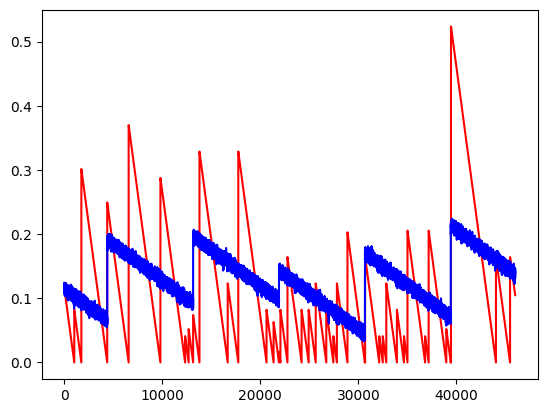

In [165]:
plt.plot(y_test, color='red')
plt.plot(predict, color='blue')
plt.show()